## Fraud Detection
#### Mahua Dwivedi

#### Data Dictionary:
* step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
* amount - amount of the transaction in local currency.
* nameOrig - customer who started the transaction
* oldbalanceOrg - initial balance before the transaction
* newbalanceOrig - new balance after the transaction
* nameDest - customer who is the recipient of the transaction
* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

#### Approach:
* Carrying out the detection using predictive modeling and will use logistic regression as the model

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df=pd.read_csv(r"C:\mahua\Projects\Accredian\Fraud.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [28]:
df.head().T

,0,1,2,3,4
step,1,1,1,1,1
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT
amount,9839.64,1864.28,181.0,181.0,11668.14
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720
oldbalanceOrg,170136.0,21249.0,181.0,181.0,41554.0
newbalanceOrig,160296.36,19384.72,0.0,0.0,29885.86
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703
oldbalanceDest,0.0,0.0,0.0,21182.0,0.0
newbalanceDest,0.0,0.0,0.0,0.0,0.0
isFraud,0,0,1,1,0


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.000000,239.000000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.570000,74871.940000,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.000000,14208.000000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.000000,0.000000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.000000,132705.665000,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.000000,214661.440000,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.000000,0.000000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.000000,0.000000,0.000000e+00,1.000000e+00
amount_ratio,6362620.0,7.067448e+04,5.084243e+05,0.0,0.234401,6.453832,1.228776e+04,9.244552e+07
balance_change_orig,6362620.0,3.847390e+02,9.987308e+03,-1.0,-0.833282,0.000000,0.000000e+00,8.131608e+05


In [6]:
df.shape

(6362620, 11)

### Data Cleaning 

In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

<Axes: >

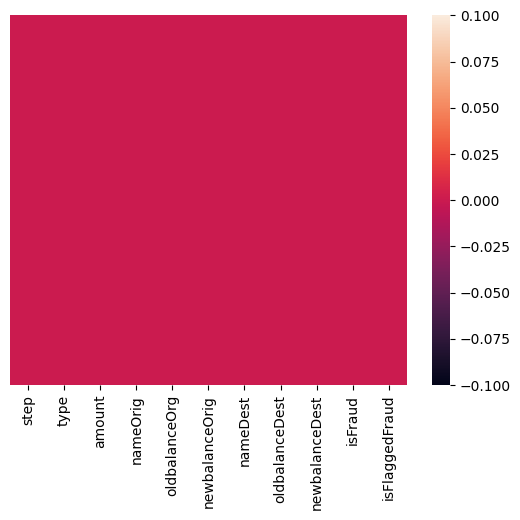

In [9]:
sns.heatmap(df.isnull(), cbar=True, yticklabels=False )

* Duplicates and null values are handled already hence dataset is clean

### Feature Engineering:
* Adding new feature to the existing dataset

In [10]:
df['isFlaggedFraud'].unique()

array([0, 1], dtype=int64)

In [11]:
df['amount_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)
df['balance_change_orig'] = (df['newbalanceOrig'] - df['oldbalanceOrg']) / (df['oldbalanceOrg'] + 1)
df['balance_change_dest'] = (df['newbalanceDest'] - df['oldbalanceDest']) / (df['oldbalanceDest'] + 1)

In [25]:
df.head().T

,0,1,2,3,4
step,1,1,1,1,1
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT
amount,9839.64,1864.28,181.0,181.0,11668.14
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720
oldbalanceOrg,170136.0,21249.0,181.0,181.0,41554.0
newbalanceOrig,160296.36,19384.72,0.0,0.0,29885.86
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703
oldbalanceDest,0.0,0.0,0.0,21182.0,0.0
newbalanceDest,0.0,0.0,0.0,0.0,0.0
isFraud,0,0,1,1,0


### Checking Correlation 

In [26]:
df.corr(numeric_only=True).T

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_ratio,balance_change_orig,balance_change_dest
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277,0.013673,-0.004818,0.006014
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295,0.817079,0.005668,0.224227
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835,-0.040134,-0.011121,-0.017464
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776,-0.040582,-0.007722,-0.021361
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513,0.307827,0.010978,-0.023978
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529,0.437502,0.006524,0.047786
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109,-0.004915,-0.001388,0.029041
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000,-0.000220,-0.000061,-0.000117
amount_ratio,0.013673,0.817079,-0.040134,-0.040582,0.307827,0.437502,-0.004915,-0.000220,1.000000,0.014318,-0.001310
balance_change_orig,-0.004818,0.005668,-0.011121,-0.007722,0.010978,0.006524,-0.001388,-0.000061,0.014318,1.000000,-0.002557


<Axes: >

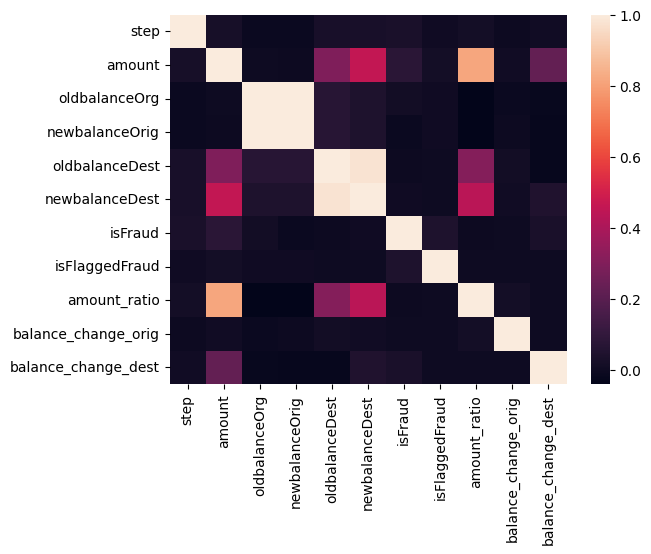

In [14]:
sns.heatmap(df.corr(numeric_only=True))

### Handling Class Imbalance

#### Checking for Imbalance
* Using the SMOTE i.e. Synthetic Minority Oversampling technique
* Class imbalance occurs when one class in the dataset is significantly underrepresented compared to other classes, which can lead to biased model performance favoring the majority class.
* Class imbalance leads to biased models favoring the majority class.

In [15]:
print('Original unbalanced dataset shape:', len(df))

Original unbalanced dataset shape: 6362620


In [16]:
data = pd.get_dummies(df, columns=['type'], drop_first=True)

# Define features and target
X = data.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = data['isFraud']

### Splitting Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [18]:
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [19]:
print('Resampled balanced dataset shape: ', len(y_train_sm))

Resampled balanced dataset shape:  8896170


* SMOTE increases the dataset size by generating synthetic samples to balance the class distribution, which helps in training more robust machine learning models.

### Data Transformation

In [20]:
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

### Training Logistic Regression Model

In [21]:
model = LogisticRegression()
model.fit(X_train_sm, y_train_sm)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

### Model Evaluation

In [23]:
print(confusion_matrix(y_test, y_pred))

[[1823812   82510]
 [     96    2368]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1906322
           1       0.03      0.96      0.05      2464

    accuracy                           0.96   1908786
   macro avg       0.51      0.96      0.52   1908786
weighted avg       1.00      0.96      0.98   1908786



### Conclusion: 
* Accuracy obtained is 96%.
* Higher accuracy is due to higher True positive and lower false negative.
* Results in considerably higher accuracy probably due to SMOTE that robustly handled the imbalance.